# Bank Personal Loan Modelling:- Identifying the Potential Customers for Loans

### 1. Import the required libraries and read the dataset.

In [1]:
# Data analysis tools
import pandas as pd
import numpy as np

# importing ploting libraries
import matplotlib.pyplot as plt   

# importing seaborn for statistical plots
import seaborn as sns

# Let us break the X and y dataframes into training set and test set. For this we will use
# Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

# model implementation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [2]:
# Reading the Data 

bank_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
# Looking-out few samples of data

bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# Performing some EDA features on data

data = bank_data.shape
print('The Bank data contains of total',data[0],'rows of entries & about',data[1],'columns' )

The Bank data contains of total 5000 rows of entries & about 14 columns


In [5]:
# Overall checking the information of the given data 

bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Inferences:-**
1. As we can see that the bank data we have, reflects the above information.
2. The data have almost 14 columns in total and around 5000 entries.
3. We can also infer by observing that there is no single null values present in the data.
4. And we can also say that present data has almost integer data type with no any object dtype present in it.

### 3. Check if there are any duplicate records present in the dataset? If yes, drop them. and Drop the columns which you feel are redundant.

In [6]:
# Checking if there are any duplicate values present in the given data.

bank_data.duplicated().sum()

0

In [7]:
# We can drop the ID column as it can scribble our data
# So we can you drop_duplicate to drop out the column

bank_data.drop('ID', axis= 1, inplace = True)

In [8]:
bank_data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### 4. Display the Five Point Summary and write your key findings.

In [9]:
# Lets view the descriptive stats of data.

bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


**Observation:-**
1. The above summary shows gives us detail information on data.
2. Cpunt tells us that there is no null value.
3. Zip code has the highest std value, which indicates how widely the data is disbursed around the mean
4. Also if we observe we can see that Zip code has wide differed outlier(96651.0) with minimum value of only 9307.0.
 

<Axes: >

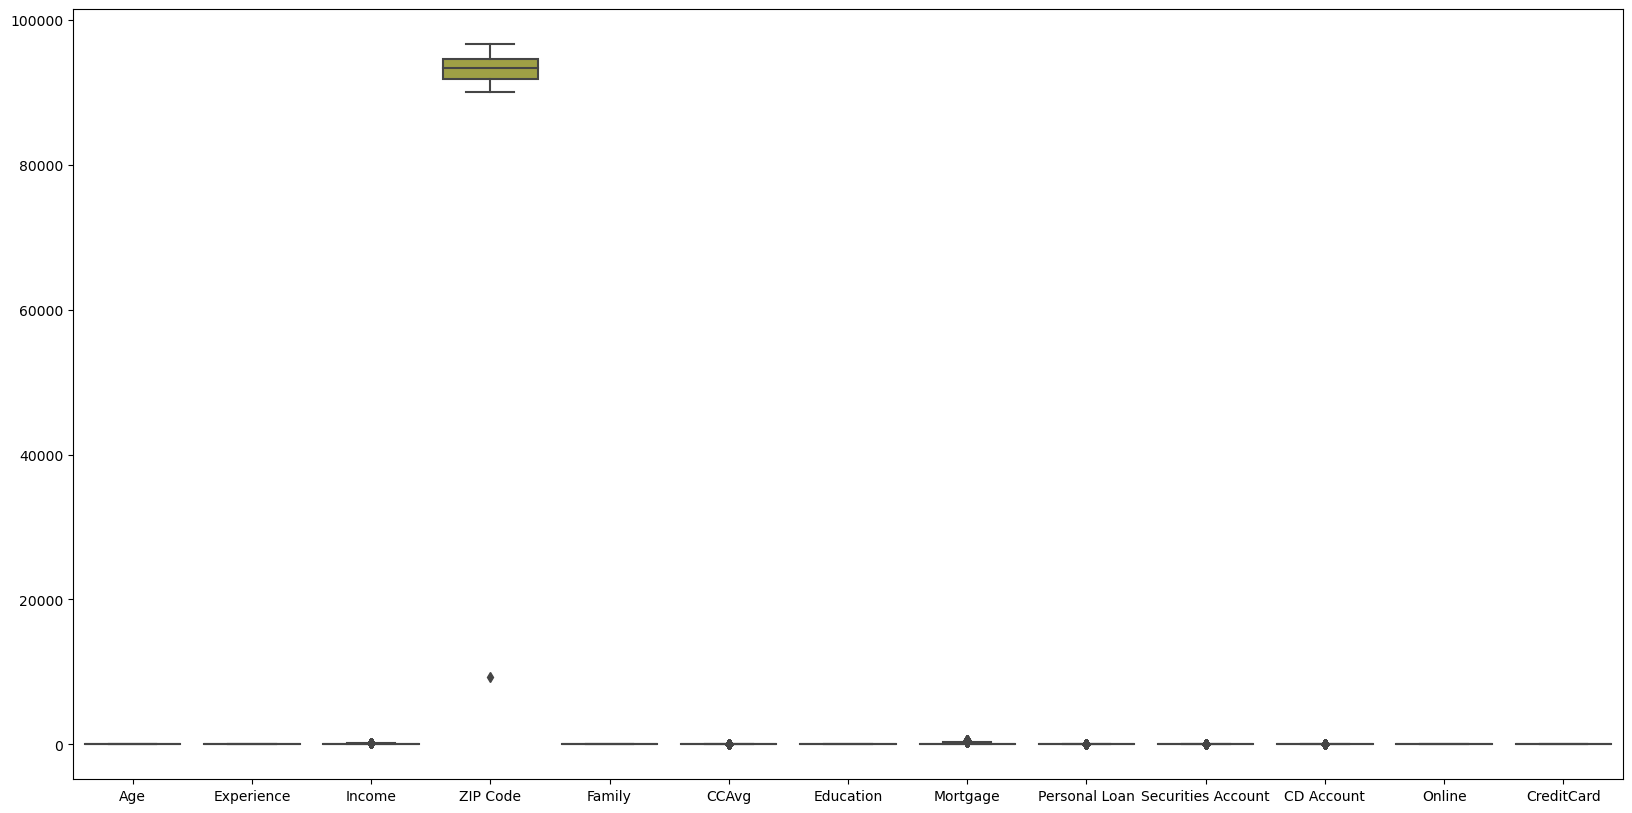

In [26]:
# Just to verify with the percentile distribution of the data, using the boxplot

plt.figure(figsize=(20,10))
sns.boxplot(bank_data, )

### 5. There are negative values in the variable 'Experience'. Convert them to non-negative values. (Hint: .abs function)

In [10]:
# So data has some negative which we can easily convert to non-negative using .abs function

negative = bank_data[bank_data['Experience']< 0]

In [11]:
# Data tells that there are almost 75 negative values

negative.sum()

Age                      1275.00
Experience                -75.00
Income                   3637.00
ZIP Code              4848530.00
Family                    149.00
CCAvg                     110.73
Education                 108.00
Mortgage                 2267.00
Personal Loan               0.00
Securities Account          6.00
CD Account                  0.00
Online                     30.00
CreditCard                 15.00
dtype: float64

In [12]:
# Converting the values to non negative

bank_data['Experience'] = bank_data['Experience'].abs()

In [13]:
# As we can se that are no negative values.

negative = bank_data[bank_data['Experience']< 0]
negative.sum()

Age                   0.0
Experience            0.0
Income                0.0
ZIP Code              0.0
Family                0.0
CCAvg                 0.0
Education             0.0
Mortgage              0.0
Personal Loan         0.0
Securities Account    0.0
CD Account            0.0
Online                0.0
CreditCard            0.0
dtype: float64

### 6. Get the target column distribution and comment on the class distribution.

In [14]:
# Just looking stats of the column "Personal Loan"

bank_data['Personal Loan'].describe()

count    5000.000000
mean        0.096000
std         0.294621
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Personal Loan, dtype: float64

<Axes: >

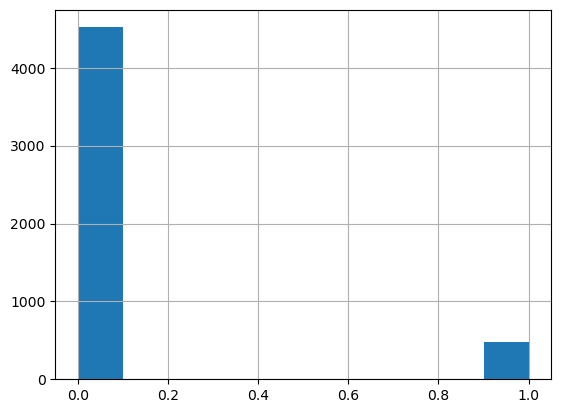

In [15]:
# For us a target column is 'Personal Loan'

bank_data['Personal Loan'].hist()

**Observation:-**
1. By looking at the plot, it indicates a highly imbalanced class distribution
2. But we can also say that there are people who are initiating to accept the personal loan offered in the campaign.

### 7. Store the target column (i.e.Personal Loan) in the y variable and the rest of the columns in the X variable.

In [16]:


bank_data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [17]:
# Creating values of X and Y for the regression analysis

Y = bank_data['Personal Loan']

In [18]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [19]:
X= bank_data.drop(['Personal Loan'], axis = 1)

In [20]:
X.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1


### 8. Split the dataset into two parts (i.e. 70% train and 30% test). and standardize the columns using the z-score scaling approach.

In [21]:
# Spliting the values X_train, X_test and Y_train, Y_test

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,test_size=0.30,random_state=1)

In [22]:
# Scale the data using appropriate approach.

ss = StandardScaler

### 9. Train and test a Logistic Regression model to predict the likelihood of a liability customer buying personal loans. Display the train and test accuracy scores.

In [29]:
# Estimating the logistic regression

log_reg = LogisticRegression()

In [30]:
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [31]:
print("Intercept of the model is",log_reg.intercept_)

Intercept of the model is [-1.16661284e-06]


In [32]:
print('Coefficents of the feature are:',log_reg.coef_)

Coefficents of the feature are: [[-4.51323321e-04 -4.44554743e-04  3.63096876e-02 -6.54861451e-05
   1.72052777e-04  1.10767918e-03  2.27451436e-04  8.50627447e-04
   9.40384098e-06  1.40675142e-04  1.21754251e-05  5.12062905e-06]]


### 10. Print the confusion matrix and classification report for the model and write your conclusions on the results.

In [33]:
y_pred = log_reg.predict(X_test)

In [34]:
metrics.accuracy_score(Y_test,y_pred)

0.908

In [35]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.30      0.39       149

    accuracy                           0.91      1500
   macro avg       0.75      0.64      0.67      1500
weighted avg       0.89      0.91      0.89      1500

